In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [6]:
data=pd.read_csv('churn_prediction_simple.csv')

In [7]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [8]:
data=data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [13]:
#churn is the target variable
#to know ehether the data is imbalanced
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [15]:
#seperating independent and dependent variable
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [17]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [21]:
#splitting
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=None)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building,predictions and odds ratio

In [23]:
from sklearn.linear_model import LogisticRegression as LR
classifier =LR(class_weight='balanced')
#instance of class LR

In [25]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test) #predicting class 0 amd 1
predicted_probabilities=classifier.predict_proba(x_test)#predicting probabilities

In [27]:
predicted_values.shape

(4414,)

In [31]:
predicted_probabilities,predicted_probabilities.shape

(array([[0.52975398, 0.47024602],
        [0.55361078, 0.44638922],
        [0.40128369, 0.59871631],
        ...,
        [0.63800755, 0.36199245],
        [0.5158374 , 0.4841626 ],
        [0.44065658, 0.55934342]]),
 (4414, 2))

# Evaluation Metrics

In [32]:
#accuracy
classifier.score(x_test,y_test)

0.733574988672406

In [35]:
#precision score
from sklearn.metrics import precision_score
Precision=precision_score(y_test,predicted_values)
Precision

0.39319727891156464

In [36]:
#recall score
from sklearn.metrics import recall_score
Recall=recall_score(y_test,predicted_values)
Recall

0.6705336426914154

In [37]:
f1=2/((1/Precision)+(1/Recall))

In [38]:
f1

0.4957118353344768

In [40]:
from sklearn.metrics import f1_score
F1=f1_score(y_test,predicted_values)
F1

0.4957118353344769

In [41]:
#all ath oneceee but for both the classes 0 and 1
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [42]:
precision


array([0.90353261, 0.39319728])

In [43]:
recall

array([0.74887387, 0.67053364])

In [44]:
f1

array([0.81896552, 0.49571184])

In [45]:
from sklearn.metrics import classification_report

In [46]:
#only representation
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3552
           1       0.39      0.67      0.50       862

    accuracy                           0.73      4414
   macro avg       0.65      0.71      0.66      4414
weighted avg       0.80      0.73      0.76      4414



In [50]:
#gathering  precision/recall scores for different thresholds

from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((4415,), (4415,), (4414,))

# Precision recal curve


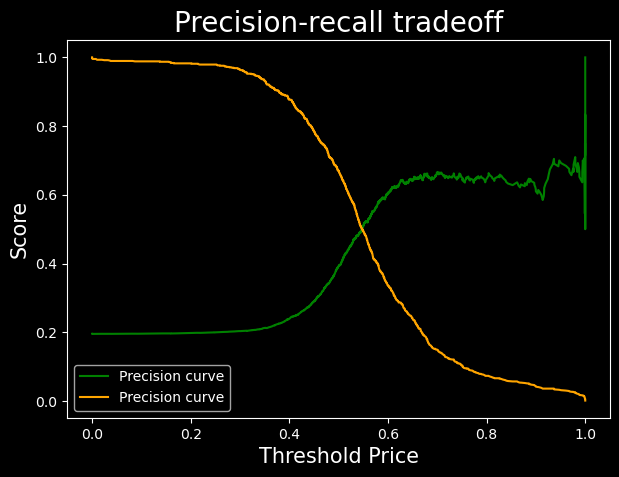

In [52]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color='green',label='Precision curve')
plt.plot(threshold_points,recall_points[:-1],color='orange',label='Precision curve')
plt.xlabel('Threshold Price',fontsize='15')
plt.ylabel('Score',fontsize=15)
plt.title('Precision-recall tradeoff',fontsize=20)
plt.legend()

In [53]:
#maxm performanance when precision=recall=0.55 something

In [54]:
from sklearn.metrics import roc_curve,roc_auc_score

In [56]:
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])

0.7509536798979956

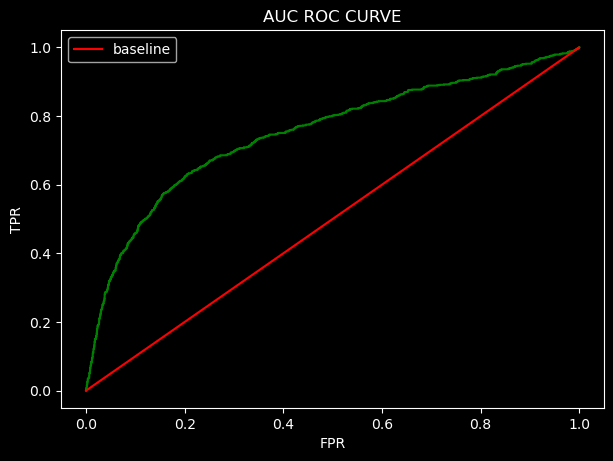

In [58]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],label='baseline',color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC CURVE')
plt.legend()
roc_auc_score(y_test,predicted_probabilities[:,1])

In [61]:
#arranging data
c=classifier.coef_.reshape(-1)
x=X.columns
coeff_plot =pd.DataFrame({
    'coefficients':c,
    'variable':x
})

#sorting the values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
9,-2.235984,current_balance
17,-0.845875,current_month_balance
18,-0.478865,previous_month_balance
13,-0.260581,current_month_credit
12,-0.240335,average_monthly_balance_prevQ2


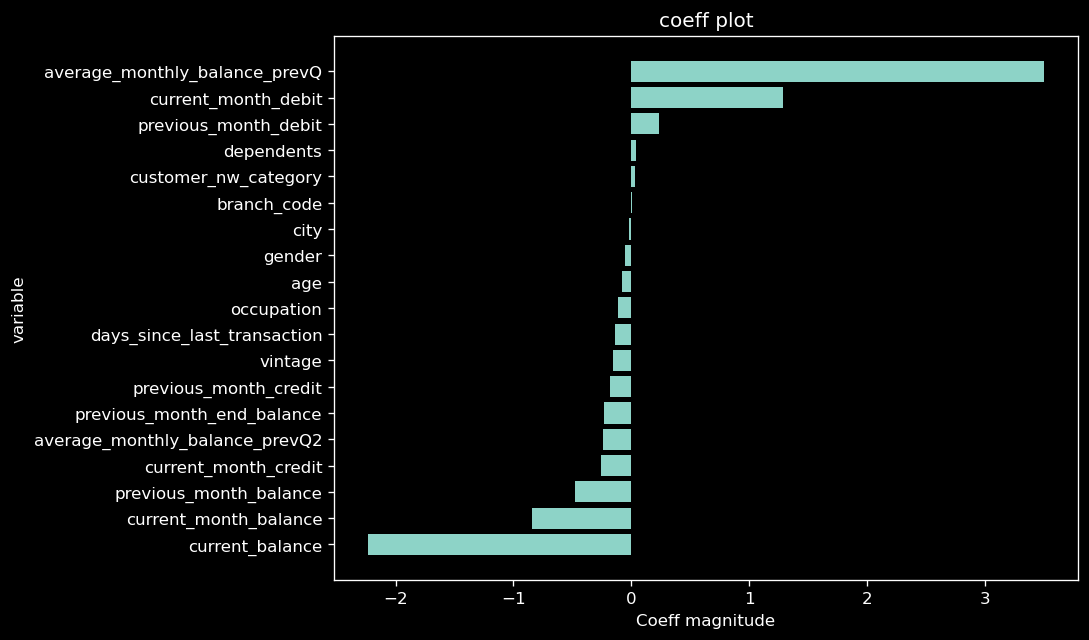

In [62]:
plt.figure(figsize=(8,6),dpi=120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel('Coeff magnitude')
plt.ylabel('variable')
plt.title('coeff plot')
plt.show()
